In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Customers.csv')
data

,Age,Education,Marital_Status,Income,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,64,Bachelor,Single,58138.0,88,546,172,88,88
1,67,Bachelor,Single,46344.0,1,6,2,1,6
2,56,Bachelor,Other,71613.0,49,127,111,21,42
3,37,Bachelor,Other,26646.0,4,20,10,3,5
4,40,PhD,Married,58293.0,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...
2205,54,Bachelor,Married,61223.0,43,182,42,118,247
2206,75,PhD,Other,64014.0,0,30,0,0,8
2207,40,Bachelor,Divorced,56981.0,48,217,32,12,24
2208,65,Master,Other,69245.0,30,214,80,30,61


In [2]:
data.isna().sum()

Age                 0
Education           0
Marital_Status      0
Income              0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64

In [3]:
cols_to_category = ['Education','Marital_Status']

# Numeric function for converting categories data to numeric value
def Numeric(data,cols_to_category,NA=True):
    for col in cols_to_category:
        var=list(data[col].unique())
        if NA==True:
            var.remove(np.nan)
        
        ctg=[i for i in range(len(var))]
        out=pd.DataFrame({col:var,'numeric':ctg})
        display(out.style.hide(axis='index'))
        data[col].replace(var,ctg,inplace=True)

Numeric(data,cols_to_category,NA=False)

Education,numeric
Bachelor,0
PhD,1
Master,2
Basic,3


Marital_Status,numeric
Single,0
Other,1
Married,2
Divorced,3
Widow,4


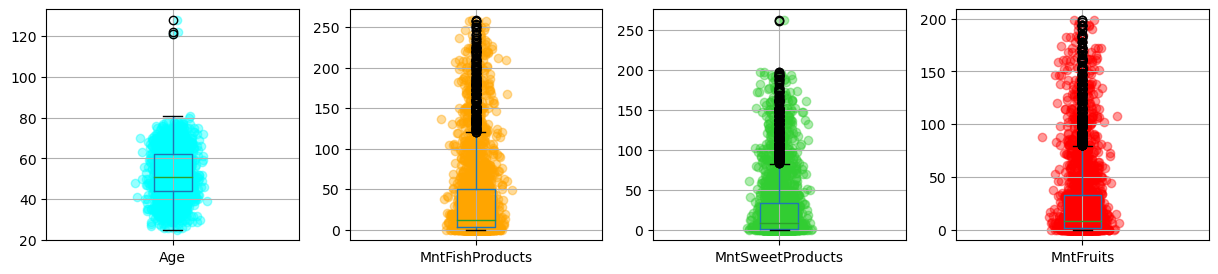

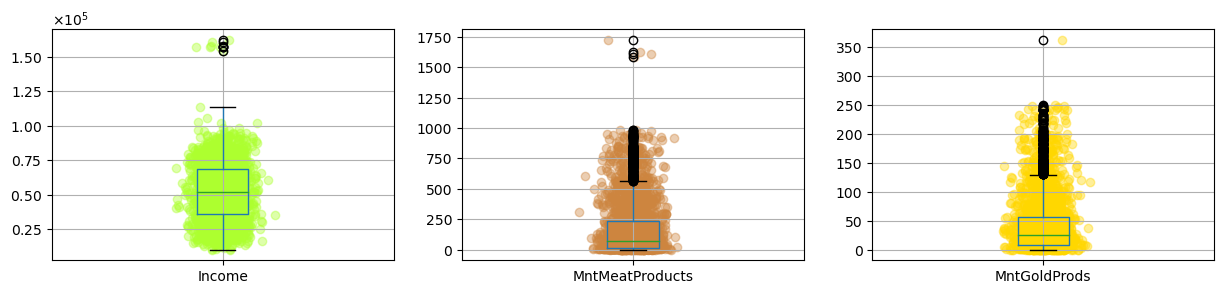

In [4]:
plt.figure(figsize=(15,3))
color=['cyan','orange','limegreen','red']
for i,col in enumerate(  list(data.columns[[0,6,7,4]])):
        
        plt.subplot(1,4,i+1)
        data.boxplot(col)
        plt.scatter(np.random.normal(1, 0.04,len(data)),data[col], alpha=0.4,color=color[i])
plt.show()

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

plt.figure(figsize=(15,3))
color=['greenyellow','peru','gold']
for i,col in enumerate( list(data.columns[[3,5,8]])):
    
        ax=plt.subplot(1,3,i+1)
        if i==0:
            ax.yaxis.set_major_formatter(formatter)
        data.boxplot(col)
        plt.scatter(np.random.normal(1, 0.04,len(data)),data[col], alpha=0.4,color=color[i])
plt.show()

In [5]:
import kmedoids

cost = []
for num_clusters in list(range(2,41)):
    km = kmedoids.KMedoids(n_clusters=num_clusters, method='fasterpam',metric='euclidean')
    km.fit(np.array(data))
    cost.append(km.inertia_)

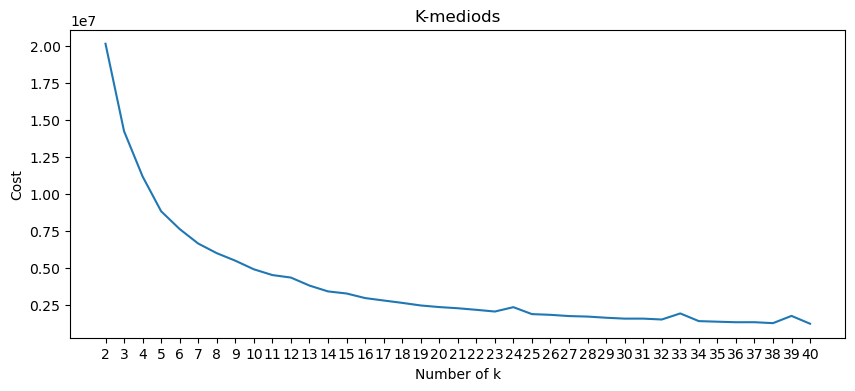

In [6]:
plt.figure(figsize=(10,4))
plt.plot([m for m in range(2,41)],cost)
plt.xticks([m for m in range(2,41)])
plt.title('K-mediods')
plt.xlabel('Number of k')
plt.ylabel('Cost')
plt.show()

In [10]:
from kmodes.kmodes import KModes

cost = []
for num_clusters in list(range(1,41)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 25)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)


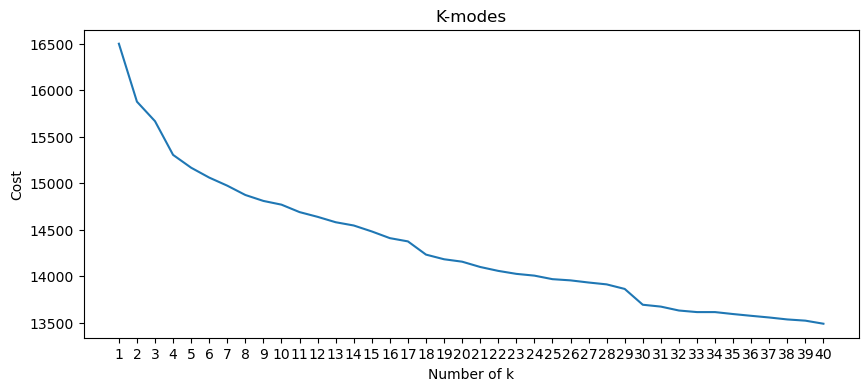

In [13]:
plt.figure(figsize=(10,4))
plt.plot([m for m in range(1,41)],cost)
plt.xticks([m for m in range(1,41)])
plt.title('K-modes')
plt.xlabel('Number of k')
plt.ylabel('Cost')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

scores = [] 
for i in range(2, 41): 
    AC = AgglomerativeClustering(n_clusters = i,linkage='complete')
    scores.append( metrics.silhouette_score(data, AC.fit_predict(data)))


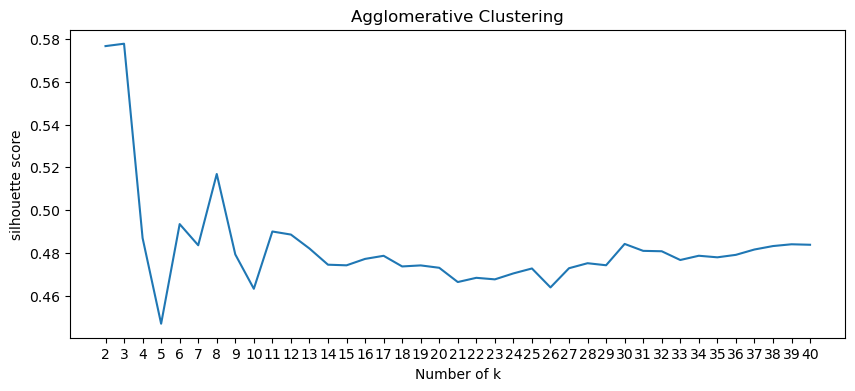

In [9]:
plt.figure(figsize=(10,4))
plt.plot([m for m in range(2,41)],scores)
plt.xticks([m for m in range(2,41)])
plt.title('Agglomerative Clustering')
plt.xlabel('Number of k')
plt.ylabel('silhouette score')
plt.show()

In [52]:
AC = AgglomerativeClustering(n_clusters = 3,linkage='complete').fit(data)
round(metrics.silhouette_score(data, AC.labels_),2)

0.58

In [48]:
km = kmedoids.KMedoids(n_clusters=5, method='fasterpam',metric='euclidean').fit(np.array(data))
round(metrics.silhouette_score(data, AC.labels_),2)

0.58

In [49]:
kmode = KModes(n_clusters=5, init = "Cao", n_init = 25).fit(data)
round(metrics.silhouette_score(data, kmode.labels_),2)

-0.13